In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#To partition the data 

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#importing library for logistic regresssion

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
#importing data
data_income=pd.read_csv('income.csv')
#creating a copy of original data
data=data_income.copy()
# exploratory data analysis
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [8]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
print("data cols with null values:\n",data.isnull().sum)

data cols with null values:
 <bound method NDFrame._add_numeric_operations.<locals>.sum of          age  JobType  EdType  maritalstatus  occupation  relationship   race  \
0      False    False   False          False       False         False  False   
1      False    False   False          False       False         False  False   
2      False    False   False          False       False         False  False   
3      False    False   False          False       False         False  False   
4      False    False   False          False       False         False  False   
...      ...      ...     ...            ...         ...           ...    ...   
31973  False    False   False          False       False         False  False   
31974  False    False   False          False       False         False  False   
31975  False    False   False          False       False         False  False   
31976  False    False   False          False       False         False  False   
31977  False    Fa

In [10]:
#*******no missing values******
#****summary of categorical variable
summary_num=data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [11]:
#****frequency of each categories
data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
#****checking for unique classes
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [13]:
data=pd.read_csv('income.csv',na_values=[" ?"])

In [14]:
#Data preprocessing

data.isnull().sum()


age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [15]:
missing=data[data.isnull().any(axis=1)]
#axis=1 => to consider atleat one column value is missing

In [16]:
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [17]:
"""points to note
1. Missing values i job type =1890
2. Missing vaues in occupation =1816
3. There are 1809 rows where two specific cols i.e occcupation & jobtype
have missing values
4. (1816-1809) => You still have occupation unfilled for
these 7 rows.Because, jobtype is never worked"""

'points to note\n1. Missing values i job type =1890\n2. Missing vaues in occupation =1816\n3. There are 1809 rows where two specific cols i.e occcupation & jobtype\nhave missing values\n4. (1816-1809) => You still have occupation unfilled for\nthese 7 rows.Because, jobtype is never worked'

In [18]:
data2=data.dropna(axis=0)
print(data2)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [19]:
#Relationship between independent variables

correlation=data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [20]:
#Cross tables and data visualization

data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [21]:
#Gender proportion table
gender=pd.crosstab(index=data2["gender"],columns='count',normalize=True)


In [22]:
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [23]:
#Gender vs salary status:
gender_salsat=pd.crosstab(index=data2["gender"],
                         columns=data2['SalStat'],
                         margins=True,
                         normalize='index')
print(gender_salsat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


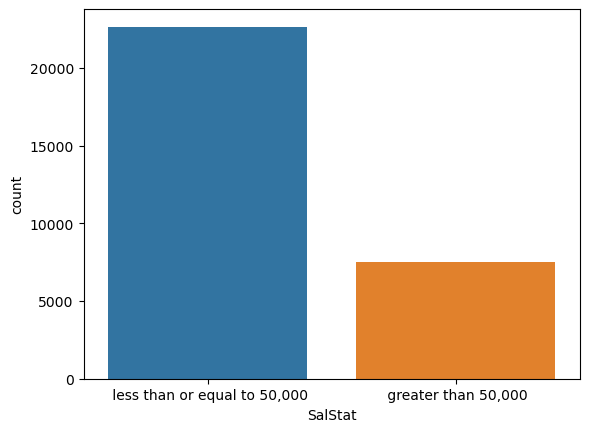

In [24]:
#Frequency distribution of salary status

SalStat=sns.countplot(data2['SalStat'])

In [25]:
"""75% of people's salary status is <=50,000
& 25% of people's salary is >50,000"""

"75% of people's salary status is <=50,000\n& 25% of people's salary is >50,000"

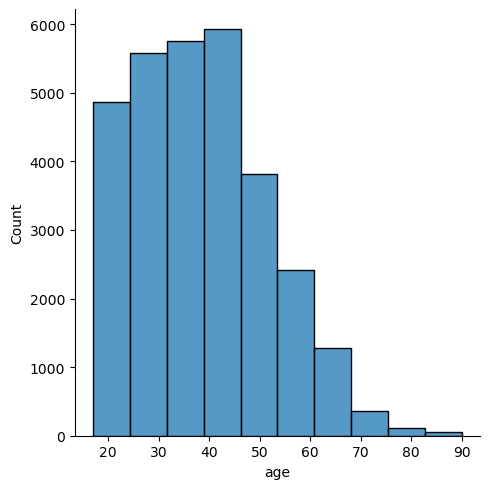

In [26]:
#*******histogram of age*******

sns.displot(data2['age'],bins=10,kde=False)

In [27]:
#people with age 25 -45 age are high in frequency

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

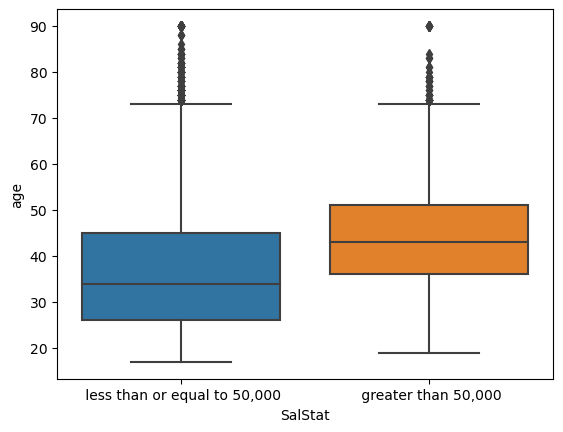

In [28]:
#*****box plot age vs salary status****
sns.boxplot('SalStat','age',data=data2)

In [30]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

In [31]:
#people with 35-50 age are more likely to earn > 50000
#people with 25-35 age are more likely to earn <=50000
data3=data.copy()
print(data3)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [32]:
#Logistic Regresssion

#reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [33]:
new_data=pd.get_dummies(data3, drop_first=True)
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  \
0       45            0            0            28        0   
1       24            0            0            40        0   
2       44            0            0            40        1   
3       27            0            0            40        0   
4       20            0            0            35        0   
...    ...          ...          ...           ...      ...   
31973   34          594            0            60        0   
31974   34            0            0            40        0   
31975   23            0            0            40        0   
31976   42            0            0            40        0   
31977   29            0            0            40        0   

       JobType_ Local-gov  JobType_ Never-worked  JobType_ Private  \
0                       0                      0                 1   
1                       0                      0                 0   
2                       0        

In [34]:
#storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Never-worked', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 

In [35]:
#Separating the input namess from data

features=list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ Jamaica', 'relationship_ Other-relative', 'nativecountry_ Mexico', 'nativecountry_ Laos', 'nativecountry_ China', 'JobType_ Local-gov', 'nativecountry_ Dominican-Republic', 'JobType_ Without-pay', 'EdType_ 12th', 'occupation_ Priv-house-serv', 'nativecountry_ Portugal', 'EdType_ Bachelors', 'JobType_ Self-emp-inc', 'nativecountry_ Yugoslavia', 'nativecountry_ Ecuador', 'occupation_ Farming-fishing', 'nativecountry_ Germany', 'EdType_ 11th', 'EdType_ Doctorate', 'nativecountry_ Japan', 'maritalstatus_ Never-married', 'nativecountry_ Hong', 'capitalloss', 'age', 'nativecountry_ Hungary', 'nativecountry_ Columbia', 'occupation_ Sales', 'nativecountry_ France', 'nativecountry_ South', 'relationship_ Wife', 'nativecountry_ Greece', 'occupation_ Other-service', 'nativecountry_ Poland', 'race_ Asian-Pac-Islander', 'nativecountry_ Philippines', 'JobType_ Private', 'occupation_ Transport-moving', 'occupation_ Exec-managerial', 'occupation_ Protective-serv', 'nativecountry_ Guat

In [36]:
#storing outtput vaues in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [37]:
#storing the values from input feature
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
data3.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [39]:
data3.dropna(axis=0,inplace=True)

In [40]:
data3.dropna(axis=0,inplace=True)

In [41]:
data3.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [42]:
#splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
#make instance of model
logistic=LogisticRegression()

In [44]:
#fitting the values
logistic.fit(train_x,train_y)
logistic.coef_

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-2.36691876e-02, -2.62083205e-01, -2.90858165e-01,
        -8.87888784e-03, -2.42200217e-02, -1.56102462e-01,
        -2.62376660e-02, -7.11343554e-03, -1.11922336e-01,
        -3.82641707e-02, -2.00670277e-02,  6.83720345e-01,
         1.82984777e-01,  1.33430535e-03, -6.65793763e-03,
        -3.34368535e-01,  9.54646189e-03, -3.43121516e-01,
         2.40797923e-01,  7.49539812e-05, -1.39369391e+00,
        -4.96392472e-03,  6.72718582e-04, -3.98724554e-03,
         1.40216658e-05, -2.19464454e-02,  1.91188120e-01,
         1.07646114e-02, -3.54593370e-02,  2.66788581e-01,
        -1.33805742e-02, -6.79703899e-01, -1.67304452e-02,
        -1.60947078e-01, -2.44941812e-02, -1.91876720e-01,
        -1.69228147e-01,  9.06786553e-01,  4.87162623e-03,
        -1.92719427e-02, -3.31235879e-01, -3.08294011e-02,
        -4.34432068e-01, -2.99285734e-01, -7.37438926e-03,
        -8.88835725e-04, -4.27495721e-01, -3.83156440e-01,
        -2.99959597e-01, -2.81190867e-03, -1.95415991e-0

In [45]:
logistic.intercept_

array([-1.11096282])

In [46]:
#prediction from test data
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [47]:
#confusion matrix
confusion_matrix=confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[6836  500]
 [ 947 1311]]


In [48]:
#calculating the accuracy
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)

0.8491765686887638


In [49]:
#printing the misclassified values from prediction
print('Misclassified samples: %d' %(test_y !=prediction).sum())

Misclassified samples: 1447


In [50]:
#******Logistic regression - removing insignificant variables

In [51]:
#reindexing the salary status names to 0,1
data4=data.copy()
data4['SalStat']=data4['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data4['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [52]:
cols=['gender','nativecountry','race','JobType']
new_data=data4.drop(cols,axis=1)
print(new_data)

       age         EdType        maritalstatus        occupation  \
0       45        HS-grad             Divorced      Adm-clerical   
1       24        HS-grad        Never-married      Armed-Forces   
2       44   Some-college   Married-civ-spouse    Prof-specialty   
3       27            9th        Never-married      Craft-repair   
4       20   Some-college        Never-married             Sales   
...    ...            ...                  ...               ...   
31973   34        HS-grad        Never-married   Farming-fishing   
31974   34   Some-college        Never-married   Protective-serv   
31975   23   Some-college   Married-civ-spouse      Adm-clerical   
31976   42   Some-college   Married-civ-spouse      Adm-clerical   
31977   29      Bachelors        Never-married    Prof-specialty   

          relationship  capitalgain  capitalloss  hoursperweek  SalStat  
0        Not-in-family            0            0            28        0  
1            Own-child            0

In [53]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [54]:
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [55]:
features=list(set(columns_list)-set(['SalStat']))
print(features)

['relationship_ Other-relative', 'relationship_ Own-child', 'occupation_ Priv-house-serv', 'EdType_ 12th', 'hoursperweek', 'EdType_ Bachelors', 'capitalgain', 'EdType_ Prof-school', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'occupation_ Farming-fishing', 'occupation_ Prof-specialty', 'occupation_ Tech-support', 'EdType_ 11th', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Doctorate', 'relationship_ Unmarried', 'maritalstatus_ Never-married', 'capitalloss', 'age', 'EdType_ 1st-4th', 'occupation_ Sales', 'EdType_ Some-college', 'relationship_ Wife', 'EdType_ Assoc-voc', 'occupation_ Other-service', 'EdType_ Assoc-acdm', 'occupation_ Transport-moving', 'occupation_ Handlers-cleaners', 'occupation_ Exec-managerial', 'occupation_ Protective-serv', 'maritalstatus_ Separated', 'occupation_ Machine-op-inspct', 'occupation_ Craft-repair', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'EdType_ 7t

In [56]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [57]:
x=new_data[features].values
print(x)

[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [58]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [59]:
logistic=LogisticRegression()

In [60]:
#fitting the values
logistic.fit(train_x,train_y)
logistic.coef_

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-2.75305525e-01, -1.14339715e+00, -4.42566067e-02,
        -1.21328904e-01,  9.66725951e-03,  6.06677134e-01,
         3.17171666e-04,  2.73652091e-01,  1.40373094e-02,
         9.84294628e-01, -2.65472240e-01,  7.48763551e-01,
         1.13985436e-01, -3.85088572e-01, -1.07454398e+00,
         5.87216560e-01, -2.57369875e-02,  2.69271871e-01,
        -6.39640511e-01, -1.57845467e+00,  6.58371759e-04,
        -7.17919130e-03, -6.93921272e-02,  1.36942070e-01,
        -4.36853090e-01,  7.71480590e-02, -9.87653260e-02,
        -7.47949390e-01, -2.57206267e-02, -1.90834433e-01,
        -3.65723273e-01,  8.88527759e-01,  4.55779769e-02,
        -1.84091997e-01, -4.20090493e-01, -3.56840289e-01,
        -6.99689393e-02, -1.19553864e-01, -2.64411449e-03,
        -2.91222469e-01, -1.45755331e-01, -4.72191246e-01,
        -1.97747761e-01]])

In [61]:
logistic.intercept_

array([-1.44007569])

In [62]:
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix
#confusion matrix
confus_matrix=confusion_matrix(test_y,prediction)
print(confus_matrix)

[[6823  513]
 [ 968 1290]]


In [64]:
#calculating the accuracy
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)


0.8456326870961017


In [65]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data_income=pd.read_csv('income.csv')
data=data_income.copy()
data4=data.copy()
data4['SalStat']=data4['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data4['SalStat'])
new_data=pd.get_dummies(data4, drop_first=True)
print(new_data)
columns_list=list(new_data.columns)
print(columns_list)
features=list(set(columns_list)-set(['SalStat']))
print(features)
y=new_data['SalStat'].values
print(y)
X=new_data[features].values
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64
       age  capitalgain  capitalloss  hoursperweek  SalStat  \
0       45            0            0            28        0   
1       24            0            0            40        0   
2       44            0            0            40        1   
3       27            0            0            40        0   
4       20            0            0            35        0   
...    ...          ...          ...           ...      ...   
31973   34          594            0            60        0   
31974   34            0            0            40        0   
31975   23            0            0            40        0   
31976   42            0            0            40        0   
31977   29            0            0            40        0   

       JobType_ Federal-gov  JobType_ Local-gov  JobType_ Never-worked  \
0    

In [67]:
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [68]:
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
predicton=KNN_classifier.predict(X_test)
print(predicton)


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0 0 0 ... 0 0 0]


In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix=confusion_matrix(y_test,predicton)
print("\t","predicted values")
print("original values","\n",confusion_matrix)


	 predicted values
original values 
 [[6683  653]
 [ 878 1380]]


In [71]:
accuracy_score=accuracy_score(y_test,predicton)
print(accuracy_score)

0.8404210965186575


In [72]:
Misclassified_sample=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    Misclassified_sample.append((y_test !=pred_i).sum())
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [73]:
print(Misclassified_sample)

[1771, 1493, 1610, 1507, 1531, 1456, 1490, 1446, 1489, 1435, 1470, 1432, 1448, 1418, 1450, 1400, 1415, 1395, 1424]
